IMPORTING NECESSARY LIBRARY AND FUNCTION

In [4]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay,cohen_kappa_score,roc_curve,auc
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

FILE UPLOADING

In [5]:
from google.colab import files
uploaded=files.upload()


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
raw_data=pd.read_csv('/content/drive/MyDrive/Data Science/EMAIL SPAM DETECTION/DATA/cleaned_email_subject_based.csv')
raw_data

,subject,spam
0,naturally irresistible your corporate identit...,1
1,the stock trading gunslinger fanny is merril...,1
2,unbelievable new homes made easy im wanting ...,1
3,4 color printing special request additional ...,1
4,"do not have money , get software cds from her...",1
...,...,...
5723,research and development charges to gpg here...,0
5724,"receipts from visit jim , thanks again for ...",0
5725,enron case study update wow ! all on the sam...,0
5726,"interest david , please , call shirley cren...",0


In [7]:
new_data=raw_data

In [8]:
new_data

,subject,spam
0,naturally irresistible your corporate identit...,1
1,the stock trading gunslinger fanny is merril...,1
2,unbelievable new homes made easy im wanting ...,1
3,4 color printing special request additional ...,1
4,"do not have money , get software cds from her...",1
...,...,...
5723,research and development charges to gpg here...,0
5724,"receipts from visit jim , thanks again for ...",0
5725,enron case study update wow ! all on the sam...,0
5726,"interest david , please , call shirley cren...",0


DECLARING X AND Y

In [9]:
x=new_data['subject']
new_data['spam'] = pd.to_numeric(new_data['spam'], errors='coerce').fillna(0).astype(int)
y=new_data['spam']

FEATURE EXTRACTION PROCEDURE


In [10]:
vectorizer=TfidfVectorizer(max_df=100,stop_words='english')
vectorized_x=vectorizer.fit_transform(x)

In [11]:
feature_names=vectorizer.get_feature_names_out()
x=pd.DataFrame(
    data=vectorized_x.toarray(),
    columns=feature_names
)
x

,0000,000000,00000000,0000000000,000000000003619,000000000003991,000000000003997,000000000005168,000000000005409,000000000005411,...,zwzm,zxghlajf,zyban,zyc,zygoma,zymg,zzmacmac,zzn,zzncacst,zzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5723,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5724,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5725,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


SPLITTING X AND Y FOR TRAIN AND TEST

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

----------------------------------------------------------------------------------------------------------------------------------------------------------------

LOGISTIC REGRESSION

In [13]:
model=LogisticRegression()
model.fit(x_train,y_train)
log_prediction=model.predict(x_test)
print("\n", confusion_matrix(y_test, log_prediction))
print(classification_report(y_test,log_prediction))


 [[881   0]
 [105 160]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       881
           1       1.00      0.60      0.75       265

    accuracy                           0.91      1146
   macro avg       0.95      0.80      0.85      1146
weighted avg       0.92      0.91      0.90      1146



--------------------------------------------------------------------------------------------------------------------------------------------------------------

NAIVE BAYES ALGORITHM

In [14]:
model=GaussianNB()
model.fit(x_train,y_train)
nb_prediction=model.predict(x_test)

In [15]:
print("\n", confusion_matrix(y_test,nb_prediction))
print(classification_report(y_test,nb_prediction))


 [[863  18]
 [ 35 230]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       881
           1       0.93      0.87      0.90       265

    accuracy                           0.95      1146
   macro avg       0.94      0.92      0.93      1146
weighted avg       0.95      0.95      0.95      1146



---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

SVM

In [16]:
model=SVC()
model.fit(x_train,y_train)
svm_prediction=model.predict(x_test)
print("\n", confusion_matrix(y_test, svm_prediction))
SVM_cr=classification_report(y_test,svm_prediction)
print(SVM_cr)


 [[880   1]
 [ 63 202]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       881
           1       1.00      0.76      0.86       265

    accuracy                           0.94      1146
   macro avg       0.96      0.88      0.91      1146
weighted avg       0.95      0.94      0.94      1146



---------------------------------------------------------------------------------------------------------------------------------------------------------------

RANDOM FOREST

In [17]:
model=RandomForestClassifier()
model.fit(x_train,y_train)
rf_prediction=model.predict(x_test)
print("\n", confusion_matrix(y_test, rf_prediction))
print(classification_report(y_test,rf_prediction))


 [[880   1]
 [ 56 209]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       881
           1       1.00      0.79      0.88       265

    accuracy                           0.95      1146
   macro avg       0.97      0.89      0.92      1146
weighted avg       0.95      0.95      0.95      1146



RANDOM FOREST VISULIZATION


In [18]:
estimator=model.estimators_[50]
estimator

DecisionTreeClassifier(max_features='sqrt', random_state=1989026033)

In [19]:
feature_name=vectorizer.get_feature_names_out()
target_name=new_data['spam'].unique()
target_name=['1','0']

In [20]:
export_graphviz(estimator, out_file='Random_forest.dot',
                feature_names =feature_name,
                class_names = target_name,
                rounded = True, proportion = False,
                precision = 2, filled = True)

In [21]:
!dot -Tpng Random_forest.dot -o Random_forest.png -Gdpi=200

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.171905 to fit


In [22]:
from IPython.display import Image
Image(filename = 'Random_forest.png')

Output hidden; open in https://colab.research.google.com to view.

----------------------------------------------------------------------------------------------------------------------------------------------------------------



DECISION TREE


In [23]:
model=DecisionTreeClassifier(max_depth=50, min_samples_split=5, min_samples_leaf=10)
model.fit(x_train,y_train)
dt_prediction=model.predict(x_test)
print("\n", confusion_matrix(y_test, dt_prediction))
print(classification_report(y_test,dt_prediction))


 [[852  29]
 [ 79 186]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       881
           1       0.87      0.70      0.77       265

    accuracy                           0.91      1146
   macro avg       0.89      0.83      0.86      1146
weighted avg       0.90      0.91      0.90      1146



VISULIZATION OF DECISION TREE

In [24]:
feature_name=vectorizer.get_feature_names_out()
target_name=new_data['spam'].unique()
target_name=['1','0']

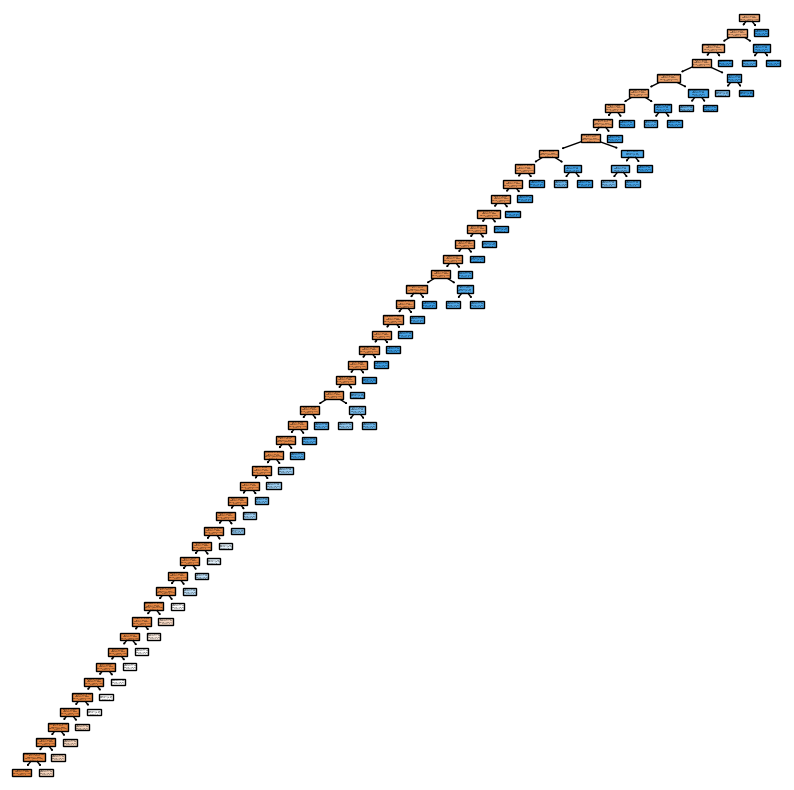

In [25]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
plot_tree(model, feature_names = feature_names, class_names = target_name, filled = True, rounded = False)
plt.savefig('tree_visualization.png')

BERT

In [34]:
!pip install tensorflow_text
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")


bert_x_train,bert_x_test,bert_y_train,bert_y_test=train_test_split(new_data['subject'],new_data['spam'],test_size=0.2)
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model_bert = tf.keras.Model(inputs=[text_input], outputs = [l])
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
]


model_bert.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [ ]:
history=model_bert.fit(bert_x_train, bert_y_train, epochs=1,batch_size=32,validation_data=(bert_x_test,bert_y_test),verbose=1)
bert_prediction=model.predict(bert_x_test)

144/144 [==============================] - 2743s 19s/step - loss: 0.4983 - accuracy: 0.7652 - precision: 0.7071 - recall: 0.0627 - val_loss: 0.4268 - val_accuracy: 0.8325 - val_precision: 0.8537 - val_recall: 0.2800


ValueError: could not convert string to float: " full - time offer terms  cantekin ,  dolores muzzy forwarded your e - mail . i apologize for not answering sooner  but i have been travelling .  unfortunately , the terms of the associate program compensation package are  not negotiable . we have reviewed our terms and believe we are competitive  with our peers . i have spoken with vince kaminski who will be calling you to  discuss .  given that it has taken 6 days to respond to you , if you are still  considering enron ' s offer of employment i will extend your deadline until  october 24 th .  please call if you have any other questions .  sincerely ,  charlene jackson"

In [30]:
bert_prediction=list(np.array(bert_prediction).reshape(-1))
bt_prediction=[1 if(e>=0.5) else 0 for e in bert_prediction]
bt_prediction=[1 if(e>=0.5) else 0 for e in bert_prediction]
print("\n", confusion_matrix(bert_y_test, bt_prediction))
print(classification_report(bert_y_test,bt_prediction))

NameError: name 'bert_prediction' is not defined

In [ ]:
history.history

COMPARISON

In [ ]:
from sklearn.metrics import f1_score
metric={
    "logistic regression":{
         "Precision": precision_score(y_test, log_prediction),
        "Recall": recall_score(y_test,log_prediction),
        "F1-score": f1_score(y_test,log_prediction),
        "Accuracy":accuracy_score(y_test,log_prediction),
         "kappa":cohen_kappa_score(y_test,log_prediction)
    },
    "SVM": {
        "Precision": precision_score(y_test, svm_prediction),
        "Recall": recall_score(y_test,svm_prediction),
        "F1-score": f1_score(y_test, svm_prediction),
        "Accuracy":accuracy_score(y_test,svm_prediction),
        "kappa":cohen_kappa_score(y_test,svm_prediction)
    },
    "Naive Bayes": {
        "Precision": precision_score(y_test, nb_prediction),
        "Recall": recall_score(y_test, nb_prediction),
        "F1-score": f1_score(y_test, nb_prediction),
        "Accuracy":accuracy_score(y_test,nb_prediction),
        "kappa":cohen_kappa_score(y_test,nb_prediction)
    },
    "Decision Tree": {
        "Precision": precision_score(y_test, dt_prediction),
        "Recall": recall_score(y_test, dt_prediction),
        "F1-score": f1_score(y_test, dt_prediction),
        "Accuracy":accuracy_score(y_test,dt_prediction),
        "kappa":cohen_kappa_score(y_test,dt_prediction)
    },
    "Random Forest": {
        "Precision": precision_score(y_test, rf_prediction),
        "Recall": recall_score(y_test, rf_prediction),
        "F1-score": f1_score(y_test, rf_prediction),
        "Accuracy":accuracy_score(y_test,rf_prediction),
        "kappa":cohen_kappa_score(y_test,rf_prediction)
    },
    "BERT":{
        "Precision": precision_score(bert_y_test, bt_prediction),
        "Recall": recall_score(bert_y_test, bt_prediction),
        "F1-score": f1_score(bert_y_test, bt_prediction),
        "Accuracy":accuracy_score(bert_y_test,bt_prediction),
        "kappa":cohen_kappa_score(bert_y_test,bt_prediction)
    }
}

In [ ]:
precision=[]
recall=[]
f1_score=[]
accuracy=[]
kappa=[]
for e in metric.keys():
  precision.append(metric[e]['Precision'])
  recall.append(metric[e]['Recall'])
  f1_score.append(metric[e]['F1-score'])
  accuracy.append(metric[e]['Accuracy'])
  kappa.append(metric[e]['kappa'])
precision

In [ ]:
r1=np.arange(6)
barwidth=0.12
r2=r1+barwidth
r3=r1+2*barwidth
r4=r1+3*barwidth
r5=r1+4*barwidth
plt.figure(figsize=(12, 12))
plt.bar(r1,precision,width=barwidth,label='Precision',color='blue')
plt.bar(r2,recall,width=barwidth,label='Recall',color='red')
plt.bar(r3,f1_score,width=barwidth,label='F1 Score',color='green')
plt.bar(r4,accuracy,width=barwidth,label='Accuracy',color='yellow')
plt.bar(r5,kappa,width=barwidth,label='kappa')
plt.title("Comparison of classification report of machine learning algorithm")
plt.xlabel("Machine Learning Algorithm")
plt.ylabel("Score")
plt.xticks([0.25,1.25,2.25,3.2,4.25,5.25],['logistic regression','SVM','Naive Bayes','Decison Tree','Random Forest','BERT'],rotation=45)
plt.legend()
plt.show()


In [ ]:
fpr1, tpr1,_ = roc_curve(y_test, log_prediction)
fpr2,tpr2,_=roc_curve(y_test,svm_prediction)
fpr3,tpr3,_=roc_curve(y_test,nb_prediction)
fpr4,tpr4,_=roc_curve(y_test,dt_prediction)
fpr5,tpr5,_=roc_curve(y_test,rf_prediction)
fpr6,tpr6,_=roc_curve(bert_y_test,bt_prediction)
area=[]
area.append(auc(fpr1,tpr1))
area.append(auc(fpr2,tpr2))
area.append(auc(fpr3,tpr3))
area.append(auc(fpr4,tpr4))
area.append(auc(fpr5,tpr5))
area.append(auc(fpr6,tpr6))
plt.plot(np.arange(1,7),area,color='blue')
plt.xlabel('Machine Learning Algorithms')
plt.ylabel('Area under curve')
plt.xticks([1,2,3,4,5,6],['logistic regression','SVM','Naive Bayes','Decison Tree','Random Forest','BERT'],rotation=45)
plt.title("Area under curve of ML algorithms")